# Task 6 - The Sparks Foundation Internship

## Predicition of Iris Data using Decision Trees

### Done by Mariam Mahmoud Fawzi

**How does decision trees work**

The decision tree is a supervised learning algorithm that can be used for both classification and regression. In our problem, it was used for classification. Just like any tree, the decision tree has a parent, child, and leaf. It is based on asking a conditional question at each node and make the best split until we reach a decision at a leaf node. We first pick a random feature and calculate it's **gini index**. Then, we calculate the **information gain** of all the other features. The information gain is calculated to find the best split. We split based on the feature with the **highest gain**. We create the other chilren by repeating this process.

### Imported Libraries

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

### Reading csv file

In [2]:
filename = 'Iris.csv'

directory = 'data'

file_directory = os.path.join(directory, filename)

dataframe = pd.read_csv(file_directory , index_col= 0)

In [3]:
#our data
dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Checking the data

In [4]:
#Data features
data = dataframe.to_numpy()
columns = dataframe.columns
columns = list(columns)
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

**Heat Map**

<AxesSubplot:>

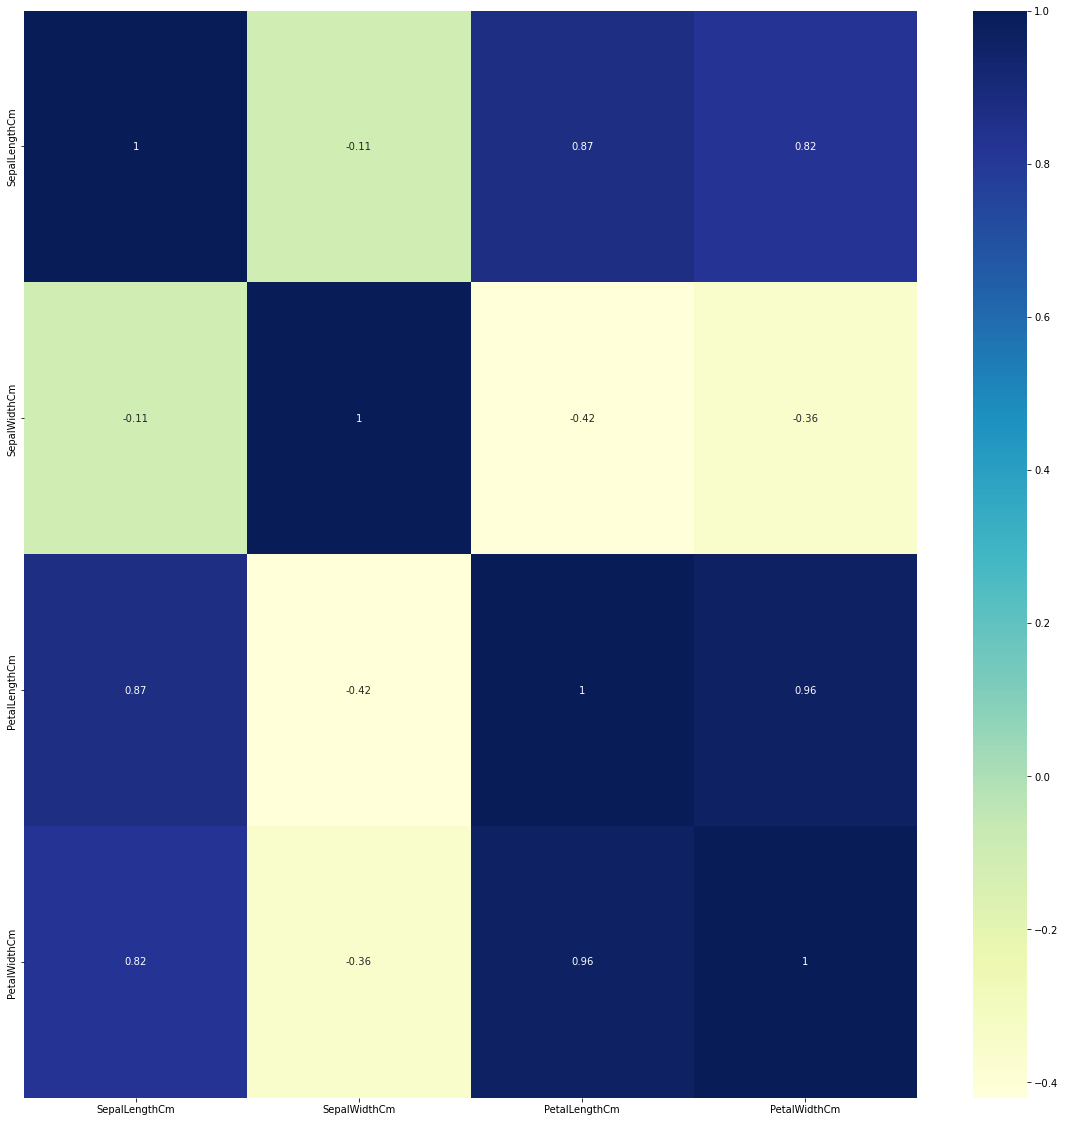

In [5]:
#Heat map to check the correlation between the features
corr = dataframe.corr()
f, ax = plt.subplots(figsize=(20, 20))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
dataplot

We can notice the relation between the features and can notice **SepalWidthCm** specifically doesn't have a high correlations with other features like the others which could possibly mean this feature has many details.

**Box plot to check if there are any outliers**

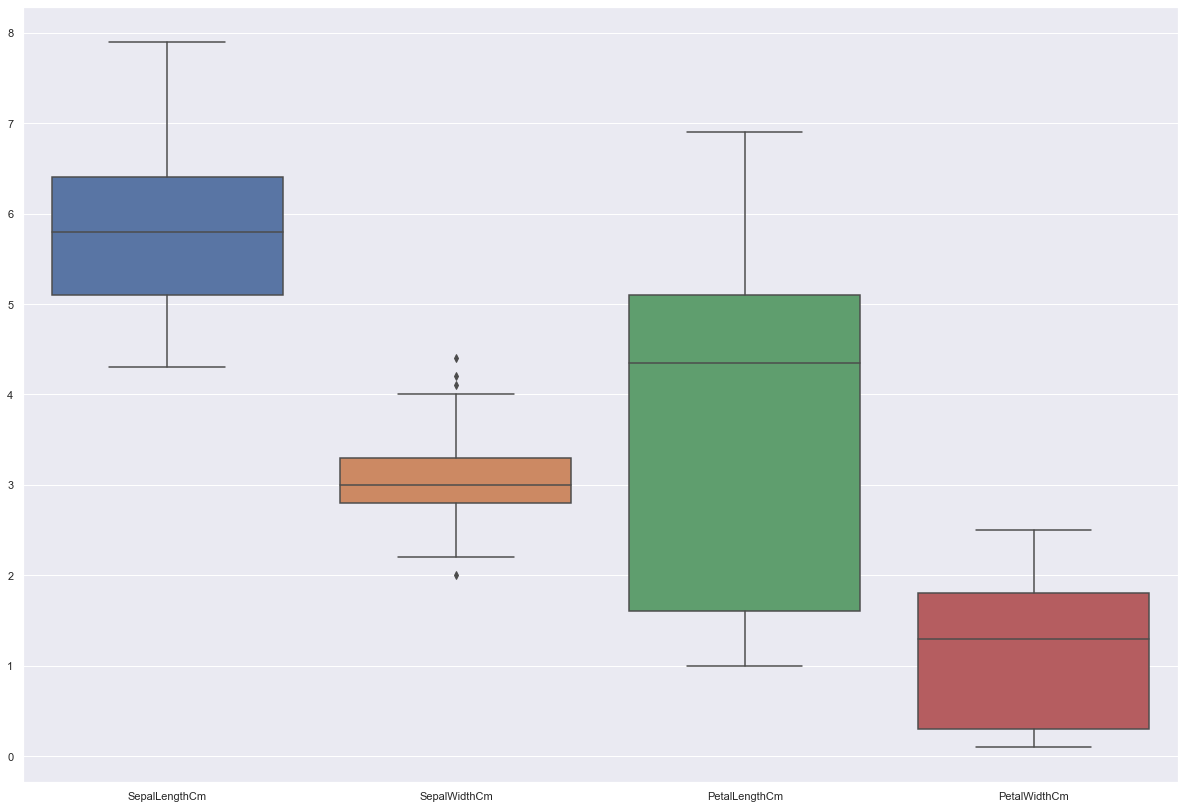

In [6]:
#box-plot
sns.set(rc={'figure.figsize':(20.7,14.27)})
display = sns.boxplot(data = dataframe)
plt.show()

We can notice that there are few outliers in **SepalWidthCm**. I decided not to remove them because they will not greatly affect the data.

### Visualizing the data

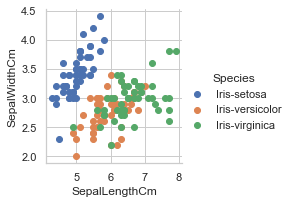

In [7]:
## Visualising 2 features based on the species

sns.set_style('whitegrid')
sns.FacetGrid(dataframe, hue='Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()



We can notice here that *Iris-versicolor* and *Iris-virginica* are overlapping while *Iris-setosa* is not.

### Preparing the data

In [8]:
target = dataframe['Species'].values
features = dataframe.drop('Species' , axis = 1)

The data will not undergo any prepocessing and will be used as given. This is because data is already numerical and decision trees don't require preprocessing the data.

We split our data into training data and test data. I use **20% for the test data** because it is the most commonly used and because the dataset it small. Also, I **stratified the train-test split**. This allows splitting the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
This will give more realistic results when predicting new data.

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42 , stratify = target)
X_train.shape

(120, 4)

In [10]:
X_test.shape

(30, 4)

### Building the model

I will use **GridSearchCV** to allow tuning the hyperparameters of the Decision Tree. 

We will only use **gini index** as our criterion. The best model is selected based on the hyperparameters **max_depth, min_samples_split, min_samples_leaf, and max_features**. After research and trials I found that these hyperparameters are the most commonly tuned ones. These parameters are used to prevent overfitting. *min_samples_split* is minimum number of observations that are required in a node to be considered for splitting, a high value of it will prevent overfitting. *min_samples_leaf* defines the minimum observations required in a leaf, lower values should be chosen for imbalanced class problems as the regions in which the minority class will be in majority will be of small size. *max_depth* used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample. *max_features* the number of features to consider while searching for the best split, higher values can lead to over-fitting but depend on case to case.

In [11]:
#setting possible values of parameters
param_values = [k for k in range(1,5)]
param = [k for k in range(2,6)]
params = {'max_depth' : param_values, 'min_samples_split' : param, \
          'min_samples_leaf' : param_values, 'max_features' : param_values, 'criterion':['gini']}

#tuning the hyperparameters discussed above
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [1, 2, 3, 4],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

Notice that in the cell above, I did **cross validation** using 10 K-folds to prevent overfitting. 

In [12]:
#best model which is the one that gave the highest score
clf = grid_search_cv.best_estimator_

### Prediction and model accuracy

In [13]:
#predicting the labels of the test set
y_pred_test = clf.predict(X_test)

In [14]:
print(f'------------------------------------------------------')
score = clf.score(X_test, y_test)
print('Accuracy Score: ', score)
#Look at classification report to evaluate the model
print(classification_report(y_test, y_pred_test))

------------------------------------------------------
Accuracy Score:  0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



We can notice that the accuracy is **93%** which is a good indicator. However, without stratifying the train-test split, we can reach 100% accuracy which is not very accurate because, it's not an accurate representation of the data.


### Tree Visualization

In [15]:
columns.remove("Species")
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

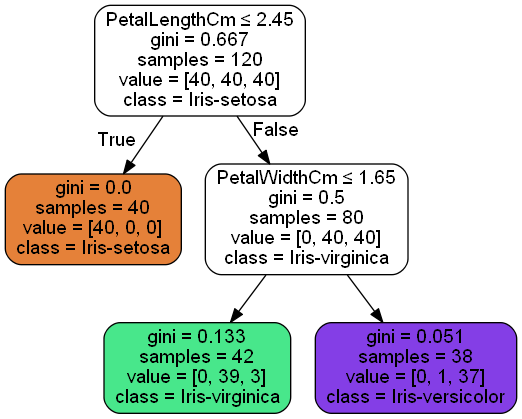

In [16]:
dot_data = StringIO()
export_graphviz(clf , out_file = dot_data , rounded = True  , filled = True , special_characters = True, feature_names = columns, class_names = ['Iris-setosa', 'Iris-virginica','Iris-versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Iris.png")
Image(graph.create_png())